In [4]:
from classification_algorithms.mlp_classifier import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### create dataset

In [10]:
def generate_random_points(size=10, low=0, high=1):
    ''' Generate a set of random 2D points
        size -- number of points to generate
        low  -- min value
        high -- max value
    '''
    return (high - low) * np.random.random_sample((size, 2)) + low

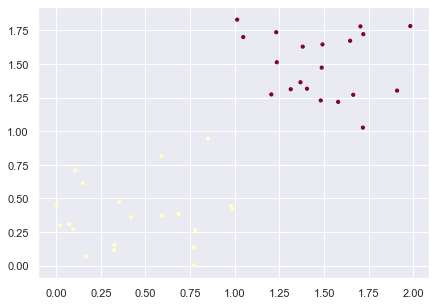

In [11]:
# training dataset
X1 = generate_random_points(20, 0, 1)
X2 = generate_random_points(20, 1, 2)
y_train = np.hstack((np.zeros(20), np.ones(20)))
X_train = np.vstack((X1, X2))
plt.figure(figsize=(7, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], cmap='YlOrRd', c=y_train, s=10)
plt.show()

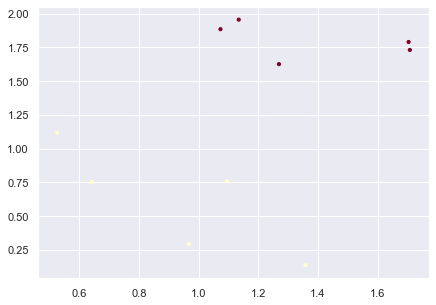

In [12]:
# testing dataset
X1 = generate_random_points(5, 0, 1.4)
X2 = generate_random_points(5, 1, 2)
y_test = np.hstack((np.zeros(5), np.ones(5)))
X_test = np.vstack((X1, X2))
plt.figure(figsize=(7, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], cmap='YlOrRd', c=y_test, s=10)
plt.show()

### build and train mlp

In [13]:
''' Build a 2-layer neural network
    1st layer: 4 neurons, sigmoid
    2nd layer: 2 neurons, softmax (default in the last layer)
'''
mlp = MLPClassifier(2, 2, [4], [sigmoid])
mlp.fit(X_train, y_train, X_test, y_test)

train error: 0.0784, train accuracy: 1.000
valid error: 0.1771, valid accuracy: 1.000
------------------------------------------------------------------
train error: 0.0386, train accuracy: 1.000
valid error: 0.1043, valid accuracy: 1.000
------------------------------------------------------------------


### predict by using mlp

In [14]:
x1 = np.linspace(X_train[:,0].min(), X_train[:,0].max(), 100)
x2 = np.linspace(X_train[:,1].min(), X_train[:,1].max(), 100)
x1, x2 = np.meshgrid(x1, x2)
y_hat = mlp.predict(np.c_[x1.flatten(), x2.flatten()]).reshape(x1.shape)

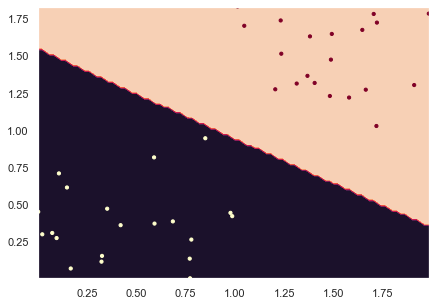

In [15]:
plt.figure(figsize=(7, 5))
plt.contourf(x1, x2, y_hat)
plt.scatter(X_train[:, 0], X_train[:, 1], cmap='YlOrRd', c=y_train, s=10)
plt.xlim([X_train[:,0].min(), X_train[:,0].max()])
plt.ylim([X_train[:,1].min(), X_train[:,1].max()])
plt.show()